## <center><strong>Metode Numerik</strong><br />
<img alt="" src="images/MetNum.png" style="" /></center>

# <center><font color="blue">Integral Numerik</font></center>

<h2 id="(C)-Taufik-Sutanto---2019" style="text-align: center;">(C) Taufik Sutanto - 2020</h2>
<h2 id="tau-data-Indonesia-~-https://tau-data.id" style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id/mfds-nm-08/mfds-nm-08/" target="_blank"><span style="color: #0009ff;">https://tau-data.id/mfds-nm-08/</span></a></h2>

# VIII. Integral Numerik:

* Pendahuluan
* Quadrature
* Trapezoidal 
* Simpson

<h1 id="Integral-Numerik---Quadrature-(Kalkulus)">Integral Numerik - Quadrature (Kalkulus)</h1>

<p><img alt="" src="images/Integral_Quadrature_Pic.png" style="width: 527px; height: 256px;" /></p>

* Definite Integral (berbatas) $ \int_a^b f(x) dx $
* Apa maknanya?
* Apa syaratnya?
* Apa contoh aplikasinya?
* Segi empat sebanyak-banyaknya atau sekecil-kecilnya?
* Dengan kata lain, sebaiknya parameternya lebar segi empat atau banyak segi empat?
* Bagaimana jika kurva dibawah sumbu x ?
* Solusi Eksak $ \int_a^b f(x) dx = F(b) - F(a)$ dimana F adalah integral dari f

# Definisi menurut Kalkulus

<p><img alt="" src="images/Integral_Quadrature_Formula.png" style="width: 586px; height: 200px;" /></p>

<h1 id="Are-segi-empat-(persegi-panjang/Quadrelateral)">Luas segi empat (persegi panjang/Quadrilateral-Rectangle)</h1>

<p><img alt="" src="images/Integral_Quadrature_Pic.png" /></p>


<h1 id="Error-Menurut-Teori-(Analitik)">Error Menurut Teori (Analitik)</h1>

<img alt="" src="images/Quadrature_Analytic_Error.png" style="width: 800px ; height: 140px" />

* Bagaimana memahami teorema ini?

<h3 id="Secara-visual"><font color="blue">Secara visual</font></h3>

<p><img alt="" src="images/Quadrature_Graphics_Error.png" style="width: 800px; height: 456px;" /></p>

<h3 id="Eksperimen-Numerik-(empiris)?"><font color="blue">Eksperimen Numerik (empiris)?</font></h3>


## Iterasi Quadrature

<p><img alt="" src="images/Integral_Quadrature_Pic.png" style="width: 527px; height: 256px;" /></p>

* Misal lebar segi empat sama = $h$
* Jika $a=x_0 < x_1 < x_2 < ... < x_n = b$
* Maka total luas segi empat = $$ h \sum_{i=1}^n f(x_i) $$ 

#### Studi Kasus

* f(x) = sin(x) pada interval $[0, \pi]$
* h = 0.01  ==> $n = round(\frac{\pi}{h})$
* Solusi Eksak = $- cos(\pi) + cos(0) = 2$

In [1]:
import numpy as np

np.pi

3.141592653589793

In [2]:
# Definisi Fungsi dan parameter-parameter permasalahan
def f(x):
    return np.sin(x) # change this to any function
    #return x**2+x-7#x**2 + 7

a = 0
b = np.pi #1 #314.1592653589793
eksak = 2

In [3]:
n = 10
Xi = np.linspace(a,b,n)
h = Xi[1]-Xi[0]
Xi

array([0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
       1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265])

In [4]:
Hasil_Integral = 0
for x in Xi:
    Hasil_Integral = Hasil_Integral + abs(f(x)) # Mengapa absolut?

Hasil_Integral = Hasil_Integral * h
print('Hasil integral = ', Hasil_Integral)
print('Error mutlak = ', abs(Hasil_Integral-eksak))
print('Error Relatif = ', abs(Hasil_Integral-eksak)/eksak)

Hasil integral =  1.9796508112164832
Error mutlak =  0.02034918878351677
Error Relatif =  0.010174594391758385


In [5]:
def F(x):
    return (1/3)*x**3 + 0.5*x**2-7*x

eksak = abs(F(1)-F(0))
eksak

6.166666666666667

# Eksperimen jika "h" semakin mengecil (n membesar)?

In [6]:
N = [n for n in range(2,100)]
e1 = [] # Error
for n in N:
    Xi = np.linspace(a,b,n)
    h = (b-a)/n
    integral = 0
    for x in Xi:
        integral = integral + abs(f(x))
    e1.append(abs(h*integral-eksak))

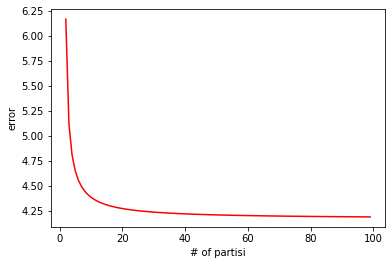

In [7]:
# Let's plot the error
import matplotlib.pyplot as plt

plt.plot(N, e1, 'r')
plt.xlabel('# of partisi');plt.ylabel('error');plt.show()
# Secara numerik permasalahan integral jauh lebih mudah ketimbang turunan .... kenapa?

# Let's stop and think of how this works

* Secara logika berarti seharusnya kalau pakai trapesium dan bukan segi empat, maka errornya lebih kecil.

<h1 id="Integral-Numerik---Trapezoid-(trapesium)">Integral Numerik - Trapezoid (trapesium)</h1>

<p><img alt="" src="images/Trapezoid_Graphics.png" style="width: 695px; height: 328px;" /></p>

<h3 id="Luas-Trapesium:">Luas Trapesium:</h3>

<p><img alt="" src="images/Trapezoid_Area.png" /></p>


<h1 id="Error-secara-teori">Error secara teori</h1>

<p><img alt="" src="images/Trapezoid_Error.png" style="width: 800px; height: 139px;" /></p>


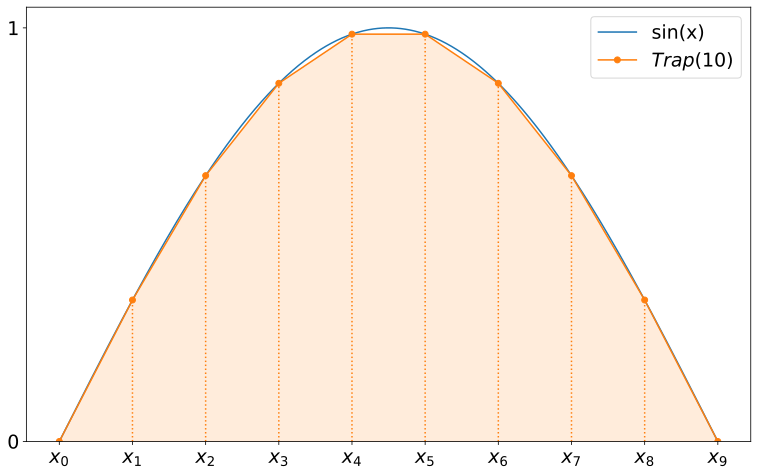

In [8]:
# https://github.com/markjay4k/fourier-transform/blob/master/numerical%20integration.ipynb

%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams.update({'font.size': 19})

def f(x):
    return np.sin(x) # change this to any function

def trap_plot(n_points, namaFungsi = ''):
    x = np.linspace(0, np.pi, 1000)          # continuous
    x_i = np.linspace(0, np.pi, n_points)    # discrete

    plt.plot(x, f(x), label=namaFungsi)
    plt.plot(x_i, f(x_i), '-o', label=r'$Trap$({})'.format(n_points))
    plt.fill(x_i, f(x_i), color='C1', alpha=0.15)
    plt.vlines(x_i, 0, f(x_i), color='C1', linestyle=':')
    plt.xticks(x_i, [r'$x_{}$'.format(n) for n in range(n_points)])
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.legend(loc='best');    plt.ylim(0, 1.05);    plt.show()

trap_plot(10,'sin(x)')

<h2 id="trapezoid-rule-equation">trapezoid rule equation</h2>

<p><img alt="" src="images/Trapezoid_eq.png" style="width: 800px; height: 259px;" /></p>


In [9]:
def trap(Xi):
    # computes the integral of f using trapezoid rule
    area = 0
    N = len(Xi)
    h = Xi[1] - Xi[0]
    for k in range(1, N):
        area += (abs(f(Xi[k - 1])) + abs(f(Xi[k]))) 
    return area * h / 2

# Numerical Experiment



In [10]:
n = 10
a = 0
b = np.pi #314.1592653589793
Xi = np.linspace(a,b,n)
eksak = 2

Hasil_Integral_Trapezoid = trap(Xi)
print('Hasil integral = ', Hasil_Integral_Trapezoid)
print('Error mutlak = ', abs(Hasil_Integral_Trapezoid-eksak))
print('Error Relatif = ', abs(Hasil_Integral_Trapezoid-eksak)/eksak)

Hasil integral =  1.979650811216484
Error mutlak =  0.020349188783516103
Error Relatif =  0.010174594391758052


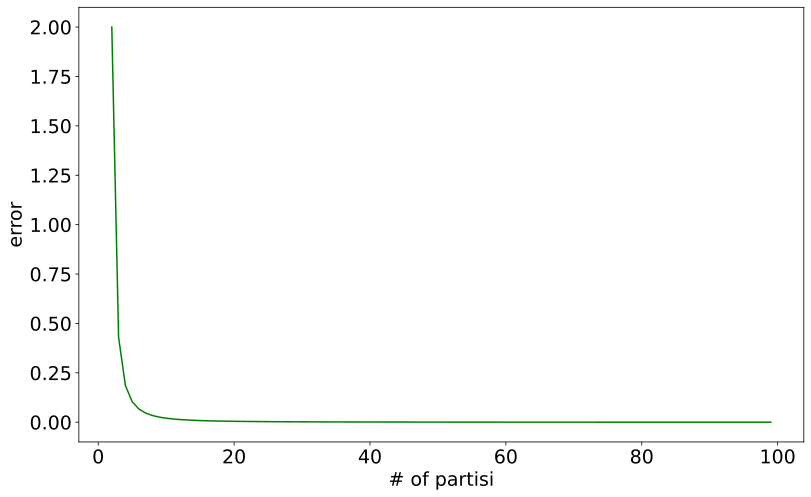

In [11]:
# Plot Error
N = [n for n in range(2,100)]
e2 = [] # Error
for n in N:
    Xi = np.linspace(a,b,n)
    #h = (b-a)/n
    integral = trap(Xi)
    e2.append(abs(integral-eksak))
plt.plot(N, e2, 'g')
plt.xlabel('# of partisi');plt.ylabel('error');plt.show()

# Hhhhhmmm... kalau trapesium berhasil lebih baik, berarti kalau kurva akan lebih baik lagi?

<h1 id="Simpson's-Rule">Simpson&#39;s Rule</h1>

<p><img alt="" src="images/Simpsons_Graphics.png" style="width: 800px; height: 252px;" /></p>


<h1 id="Error-Metode-Simpson-Secara-Analytic">Error Metode Simpson Secara Analytic</h1>

<p><img alt="" src="images/Simpsons_Analytics_Error.png" style="width: 800px; height: 146px;" /></p>


In [12]:
# Warning, this code is "dumb"
def simpson(x):
    # computes the integral of f using Simpson's rule
    N = len(x)
    area = 0
    h = x[1] - x[0]
    area += abs(f(x[0]))+abs(f(x[-1]))
    p = True
    for k in range(1, N):
        if p:
            area += abs(4*f(x[k]))
            p = False
        else:
            area += abs(2*f(x[k]))
            p = True
    return area*(h/3)

In [13]:
eksak = 2
a = 0
b = np.pi #314.1592653589793
n = 4
Xi = np.linspace(a,b,2*n)

Hasil_Integral_Simpson = simpson(Xi)
print('Hasil integral = ', Hasil_Integral_Simpson)
print('Error mutlak = ', abs(Hasil_Integral_Simpson-eksak))
print('Error Relatif = ', abs(Hasil_Integral_Simpson-eksak)/eksak)

Hasil integral =  1.9663166787658923
Error mutlak =  0.033683321234107666
Error Relatif =  0.016841660617053833


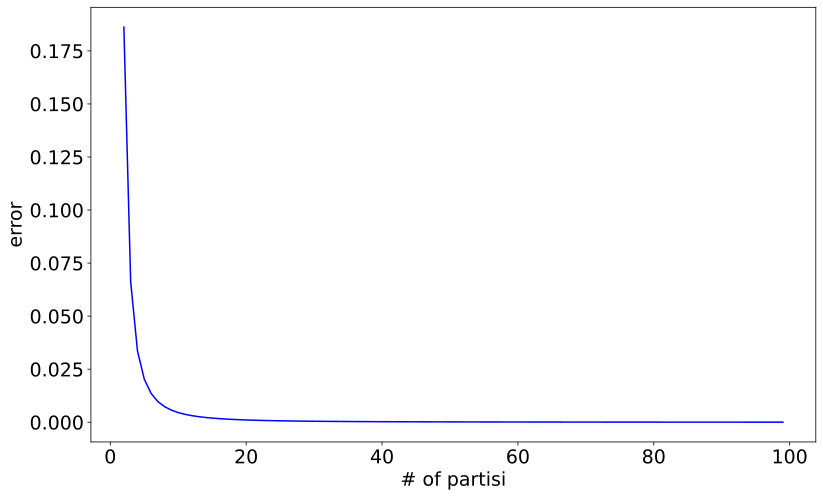

In [14]:
# Plot Error
def f(x):
    return np.sin(x)

N = [n for n in range(2,100)]
e3 = [] # Error
for n in N:
    Xi = np.linspace(a,b,2*n)
    h = (b-a)/n
    integral = simpson(Xi)
    e3.append(abs(integral-eksak))
plt.plot(N, e3, 'b')
plt.xlabel('# of partisi');plt.ylabel('error');plt.show()

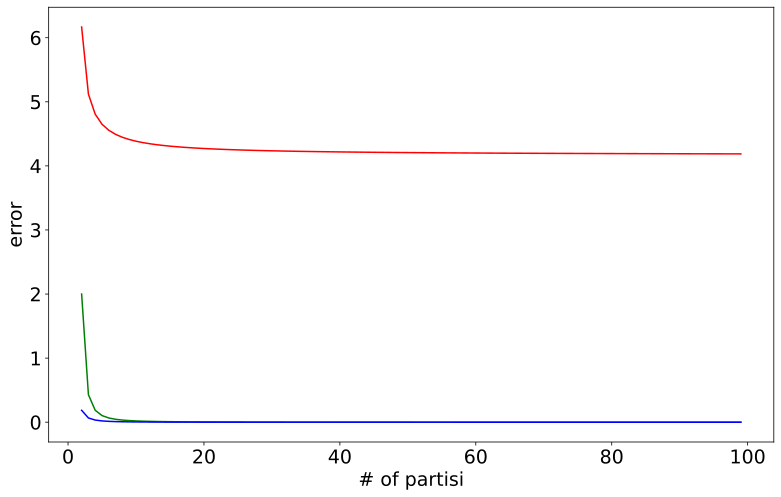

In [15]:
plt.plot(N, e1, 'r')
plt.plot(N, e2, 'g')
plt.plot(N, e3, 'b')
plt.xlabel('# of partisi');plt.ylabel('error');plt.show()

## Latihan Soal

* $\int_1^3 3x^2 - 2$
* n = 2

Hitung Error Relatif dari pendekatan berikut:

1. Quadrature (segi empat) - UAS +20
2. Trapezoid - UAS +20
3. Simpson - UAS +20

In [16]:
def f(x):
    return 3*x**2 - 2
def FF(x):
    return x**3 - 2*x
eksak = FF(3)-FF(1)
h = (3-1)/2
Q = h * (f(1) + f(2)) #h * (f(1) + f(1+h))
T =  (h/2) * ( f(1)+ 2* f(2) +f(3)) #(h/2) * ( f(1)+ 2* f(1+h) +f(1+2*h))
S = (h/3)*(f(1)+4*f(1.5)+f(2))+(h/3)*(f(2)+4*f(2.5)+f(3)) #(h/3) * ( f(1) + 4*f(1+h/2) + f(1+h) )  +  (h/3) * (f(1+h) + 4*f(1+3*h/2) + f(3)) 
print('h = ', h)
print('Integral Eksak = ', eksak)
print('Error Relatif Quadrature = ',abs(eksak-Q)/abs(eksak))
print('Error Relatif Trapezoid = ',abs(eksak-T)/abs(eksak))
print('Error Relatif Simpson = ',abs(eksak-S)/abs(eksak))

h =  1.0
Integral Eksak =  22
Error Relatif Quadrature =  0.5
Error Relatif Trapezoid =  0.045454545454545456
Error Relatif Simpson =  1.0


# End of Module